## Churn Prediction Analysis Part 1

#### Q. What is Churn Prediction analysis

In [2]:
# Import all the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline


import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")

import plotly.offline as py
py.init_notebook_mode(connected=True) #visualization
import plotly.graph_objs as go  #visualization
import plotly.subplots as sp   #visualization
import plotly.figure_factory as ff  #visualization
import os
print(os.getcwd())

C:\Users\Owner\Desktop\Sem3\DAB303 Marketing Analytics\Project 1


## Data Import
- Telecom Churn Data

In [3]:
telcom = pd.read_csv("Telco-Customer-Churn.csv")

## Data Overview

In [4]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
print ("Rows     : " ,telcom.shape[0])
print ("Columns  : " ,telcom.shape[1])
print ("\nFeatures : \n" ,telcom.columns.tolist())
print ("\nUnique values :  \n",telcom.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [6]:
telcom.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
telcom = telcom.replace(" ", np.NaN)
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
telcom.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Data Cleaning

We will keep 20 input variables and 1 output variable (Churn) to create the model
- customerID (Char w/ 7043 levels "0002-ORFBO","0003-MKNFE",)
- gender (Factor w/ 2 levels "Female","Male")
- SeniorCitizen (int)
- Partner (Factor w/ 2 levels "No","Yes")
- Dependents (Factor w/ 2 levels "No","Yes")
- tenure (int)
- PhoneService (Factor w/ 2 levels "No","Yes")
- MultipleLines (Factor w/ 3 levels "No","No phone service",)
- InternetService (Factor w/ 3 levels "DSL","Fiber optic",)
- OnlineSecurity (Factor w/ 3 levels "No","No internet service",)
- OnlineBackup (Factor w/ 3 levels "No","No internet service",)
- DeviceProtection (Factor w/ 3 levels "No","No internet service",)
- TechSupport (Factor w/ 3 levels "No","No internet service",)
- StreamingTV (Factor w/ 3 levels "No","No internet service",)
- StreamingMovies (Factor w/ 3 levels "No","No internet service",)
- Contract (Factor w/ 3 levels "Month-to-month",)
- PaperlessBilling (Factor w/ 2 levels "No","Yes")
- PaymentMethod (Factor w/ 4 levels "Bank transfer (automatic)",)
- MonthlyCharges (num)
- TotalCharges (num)
- Churn (Factor w/ 2 levels "No","Yes")


In [9]:
missing_data = telcom.isnull()

In [10]:
# Count missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

customerID
False    7043
Name: customerID, dtype: int64

gender
False    7043
Name: gender, dtype: int64

SeniorCitizen
False    7043
Name: SeniorCitizen, dtype: int64

Partner
False    7043
Name: Partner, dtype: int64

Dependents
False    7043
Name: Dependents, dtype: int64

tenure
False    7043
Name: tenure, dtype: int64

PhoneService
False    7043
Name: PhoneService, dtype: int64

MultipleLines
False    7043
Name: MultipleLines, dtype: int64

InternetService
False    7043
Name: InternetService, dtype: int64

OnlineSecurity
False    7043
Name: OnlineSecurity, dtype: int64

OnlineBackup
False    7043
Name: OnlineBackup, dtype: int64

DeviceProtection
False    7043
Name: DeviceProtection, dtype: int64

TechSupport
False    7043
Name: TechSupport, dtype: int64

StreamingTV
False    7043
Name: StreamingTV, dtype: int64

StreamingMovies
False    7043
Name: StreamingMovies, dtype: int64

Contract
False    7043
Name: Contract, dtype: int64

PaperlessBilling
False    7043
Name: PaperlessBill

#### Work with the Total Charges Column

In [11]:
#Dropping null values from total charges column which contain .15% missing data 
telcom = telcom[telcom["TotalCharges"].notnull()]
telcom = telcom.reset_index()[telcom.columns]

#convert to float type
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)

In [12]:
#Replace 'No internet service' to 'No' for the following 6 columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})

In [13]:
#replace values in Senior Citizen column
telcom["SeniorCitizen"] = telcom["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [14]:
# Convert Tenure to categorical column
def tenure_lab(telcom) :
    
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"

telcom["tenure_group"] = telcom.apply(lambda telcom:tenure_lab(telcom),
                                      axis = 1)

In [15]:
telcom.tenure_group.unique()

array(['Tenure_0-12', 'Tenure_24-48', 'Tenure_12-24', 'Tenure_gt_60',
       'Tenure_48-60'], dtype=object)

In [16]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


#### Dependent Variable or Variable of Interest is Churn

In [17]:
#Separating churn and non churn customers

churn     = telcom[telcom["Churn"] == "Yes"]
not_churn = telcom[telcom["Churn"] == "No"]

In [18]:
print ('Customers who stayed', len(not_churn))
print ('Customers who left', len(churn))


Customers who stayed 5163
Customers who left 1869


In [19]:
#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = telcom.keys().tolist()

In [20]:
cat_cols

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'tenure_group']

In [21]:
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()

In [22]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'tenure_group']

In [23]:
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

In [24]:
Id_col

['customerID']

In [25]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'tenure_group']

In [26]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

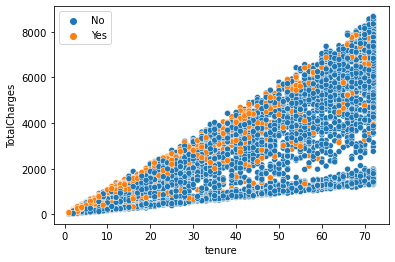

In [27]:
# Create a scatter plot

sns.scatterplot(data = telcom, x =telcom['tenure'], y = telcom['TotalCharges'], hue=telcom.Churn.tolist())

#### Q.What does the above plot indicate? 

 There is a positive correlation between tenure and Total Charges, irrespective of customer churn. Meaning longer the customer stayed,the more they paid.

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

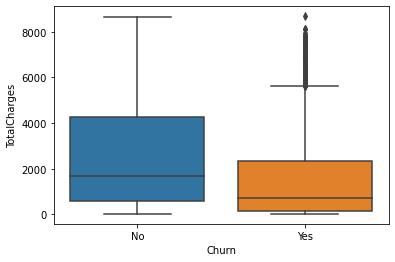

In [28]:
sns.boxplot(data= telcom, x="Churn", y="TotalCharges")

#### Q What does the above plot indicate?

The median of Total charges for customers churned is about 1000, which is lower than those not churned. IQR for customers not churned is wider than those churned. Both distributions are right skewed.

# Exploratory Data Analysis
## Churn No-Churn Ratio
### You need to run the code below to create a Pie chart and understand the output

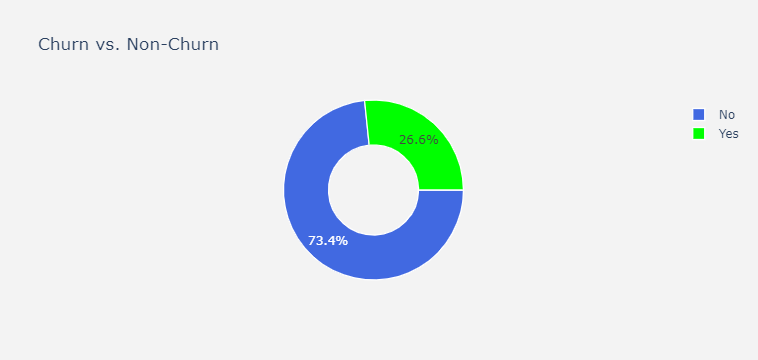

In [29]:

#labels
lab = telcom["Churn"].value_counts().keys().tolist()
#values
val = telcom["Churn"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Churn vs. Non-Churn",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)



#### Q. Comment on this distribution

About 27% of the customers in our dataset were churned

In [30]:
data

[Pie({
     'hole': 0.5,
     'hoverinfo': 'label+value+text',
     'labels': [No, Yes],
     'marker': {'colors': ['royalblue', 'lime'], 'line': {'color': 'white', 'width': 1.3}},
     'rotation': 90,
     'values': [5163, 1869]
 })]

In [31]:
telcom['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [32]:
# Save the cleaned file
telcom.to_csv('clean_df.csv')

## Varibles distribution in Churn and Non-churn category: Pie Charts for Categorical variables
### You need to run the code and understand the output

In [33]:
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer Churn ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig,filename='Graphs')
    


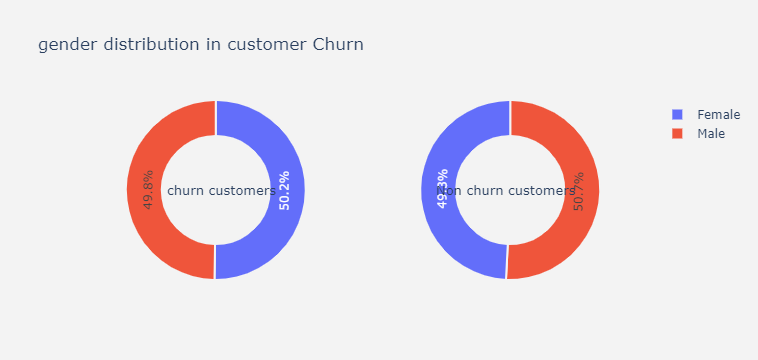

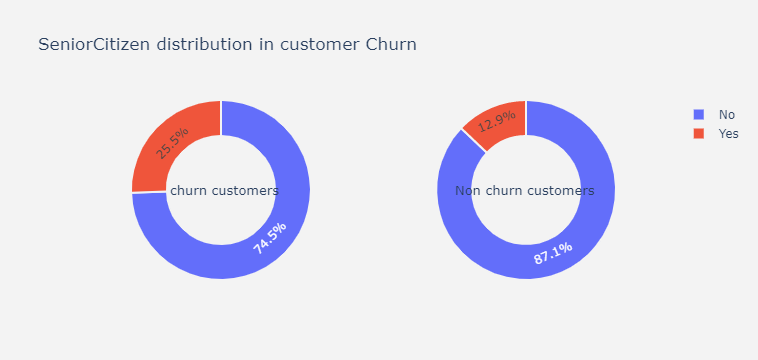

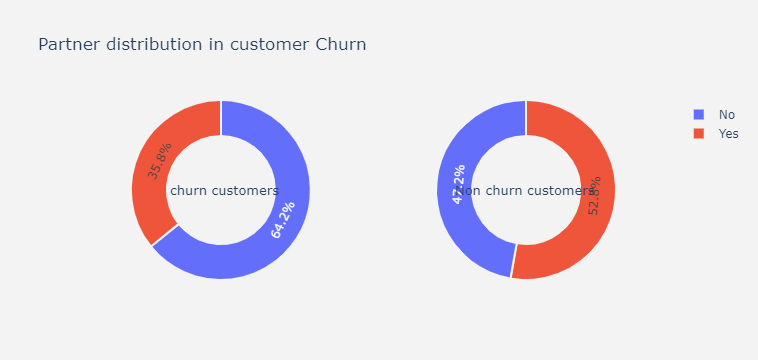

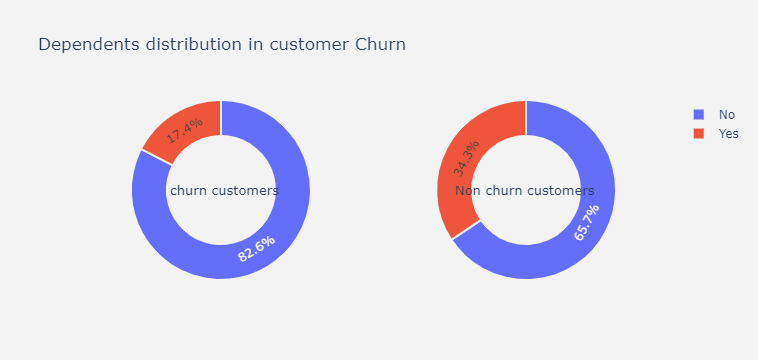

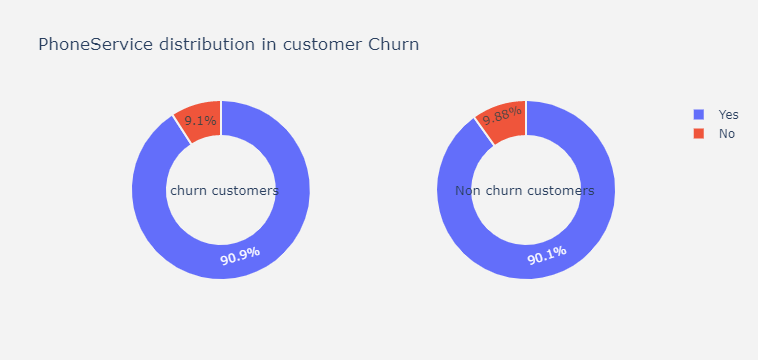

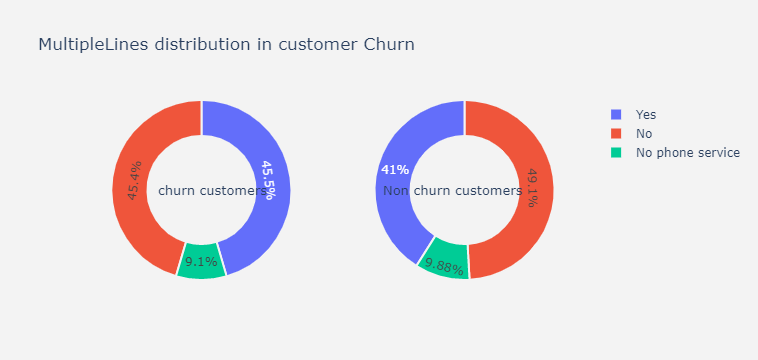

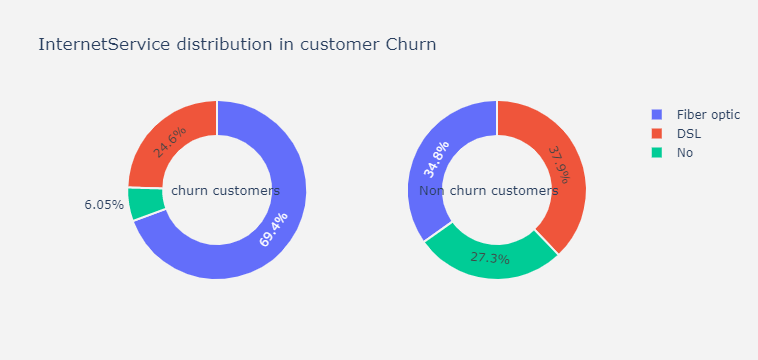

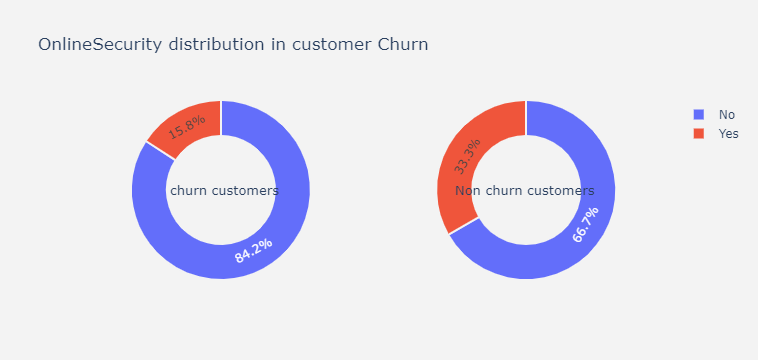

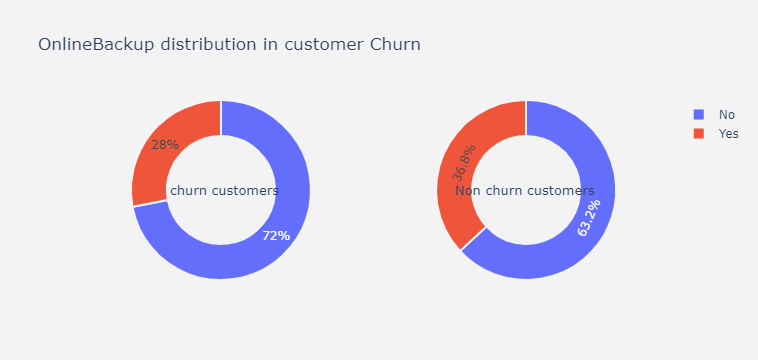

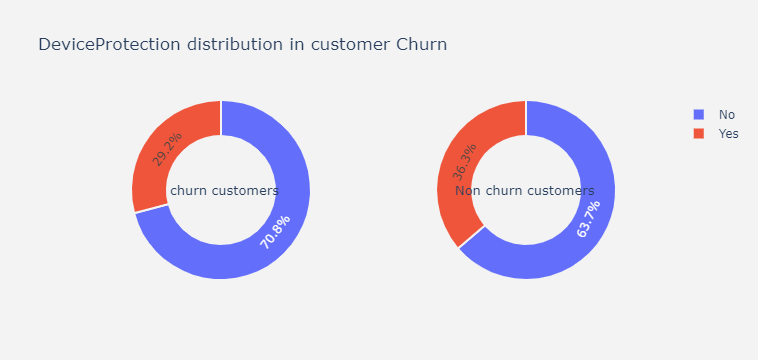

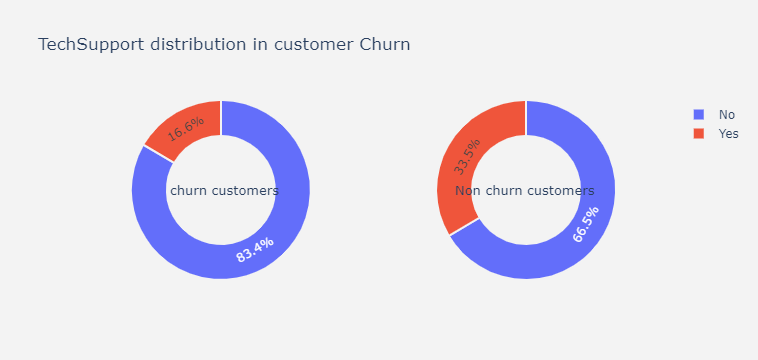

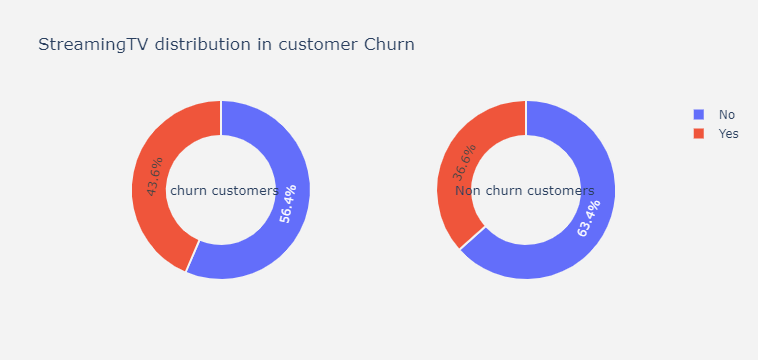

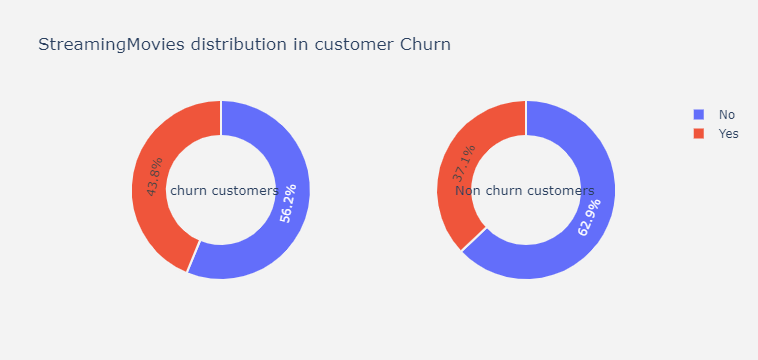

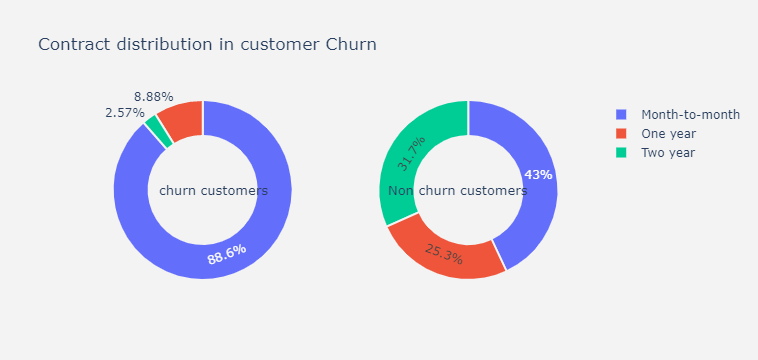

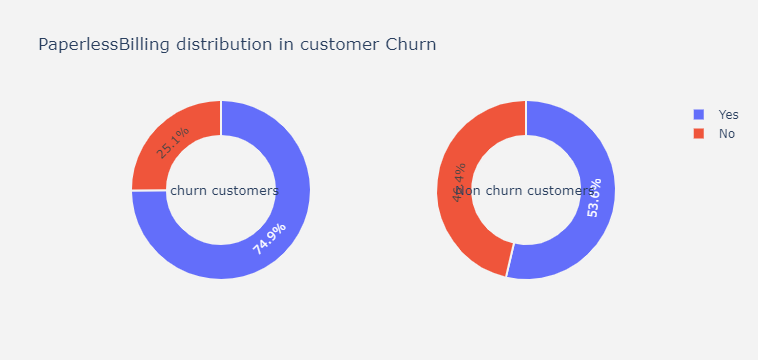

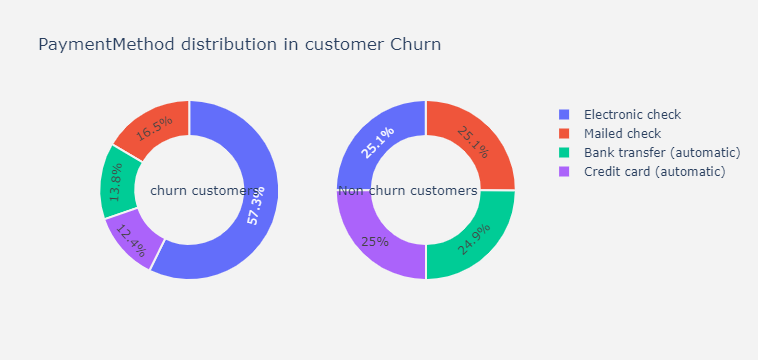

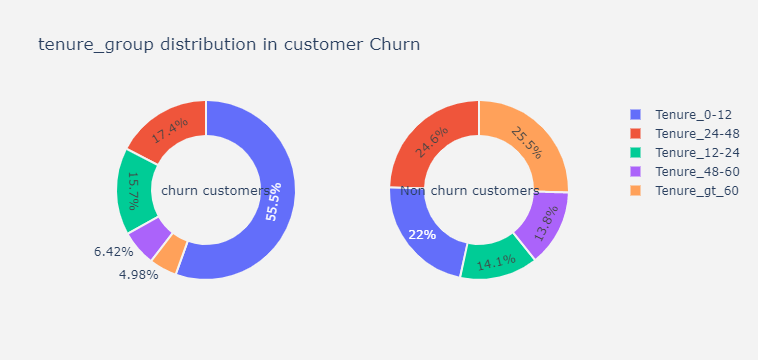

In [34]:
# for all categorical columns plot pie

for i in cat_cols :
    plot_pie(i)

#### Q. Comment on each and every chart. Is there any chart that does not make sense? 
Equal % of male and female customers were churned and retained.
Most of the cutomers churned were not Senior citizens.
More than 50% of the customer retained had a partner while most of the customers churned had no partner. more retained customers had dependendts than churned customers. Most of the churned customers had Fiber Optic as their InternetService and most of the retained had DSL as well as a fair share of Fibre Optic.
Security & Support features like onlinebackup, onlinesecurity, deviceprotection, techsupport were not highly comparable in Churned & non-churned customers.But evidently customers having these features were churned slighty less.
StreamingMovie and StreaminTV do not make that much sense because a major part of retained customers didnt have them but a lot of churned customers had them.
Most of the churned customesr were paying month-to-month with eletronic check. While customers who signed longer contract have lower churn rate.Tenure group pie tells us that more than 50% of the churned customers had been with the company for 0-2 years, so company mostly lost newer customers. Customers with greater teures were lost considerably less.

## Varibles distribution in Churn and Non-churn category: Histograms for Numerical variables
### You need to run the code and understand the output



In [35]:

#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer Churn ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

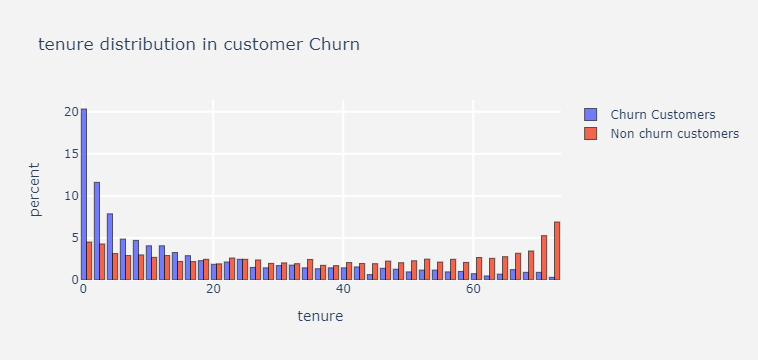

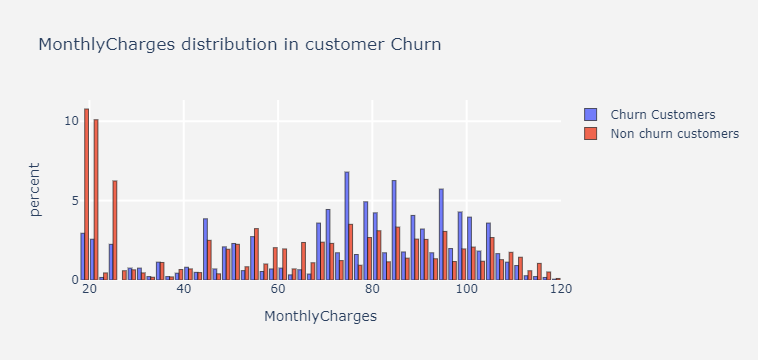

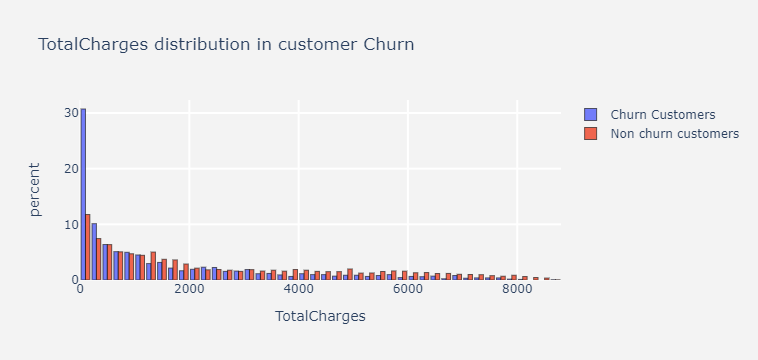

In [36]:
#for all categorical columns plot histogram    
for i in num_cols :
    histogram(i)
plt.show()

#### Q. Comment on each and every chart. Is there any chart that does not make sense?
The tenure distribution tells us what we already know that majority of the newer customers with tenure less than 2 years were churned. Monthly charges distribution tells us that major percentage of the churned customers had higher monthly charges, while far more retained customers had lesser monthly charges. Total charges distribution does not make sense because about 30% of churned customer had 0-200 total charges.

## Scatter Plot for Numerical variables
### You need to run the code and understand the output


In [37]:
#function  for scatter plot matrix  for numerical columns in data
def scatter_matrix(df)  :
    
    df  = df.sort_values(by = "Churn" ,ascending = True)
    classes = df["Churn"].unique().tolist()
    classes
    
    class_code  = {classes[k] : k for k in range(2)}
    class_code

    color_vals = [class_code[cl] for cl in df["Churn"]]
    color_vals

    pl_colorscale = "Portland"

    pl_colorscale

    text = [df.loc[k,"Churn"] for k in range(len(df))]
    text

    trace = go.Splom(dimensions = [dict(label  = "tenure",
                                       values = df["tenure"]),
                                  dict(label  = 'MonthlyCharges',
                                       values = df['MonthlyCharges']),
                                  dict(label  = 'TotalCharges',
                                       values = df['TotalCharges'])],
                     text = text,
                     marker = dict(color = color_vals,
                                   colorscale = pl_colorscale,
                                   size = 3,
                                   showscale = False,
                                   line = dict(width = .1,
                                               color='rgb(230,230,230)'
                                              )
                                  )
                    )
    axis = dict(showline  = True,
                zeroline  = False,
                gridcolor = "#fff",
                ticklen   = 4
               )
    
    layout = go.Layout(dict(title  = 
                            "Scatter plot matrix for Numerical columns for customer churn",
                            autosize = False,
                            height = 800,
                            width  = 800,
                            dragmode = "select",
                            hovermode = "closest",
                            plot_bgcolor  = 'rgba(240,240,240, 0.95)',
                            xaxis1 = dict(axis),
                            yaxis1 = dict(axis),
                            xaxis2 = dict(axis),
                            yaxis2 = dict(axis),
                            xaxis3 = dict(axis),
                            yaxis3 = dict(axis),
                           )
                      )
    data   = [trace]
    fig = go.Figure(data = data,layout = layout )
    py.iplot(fig)

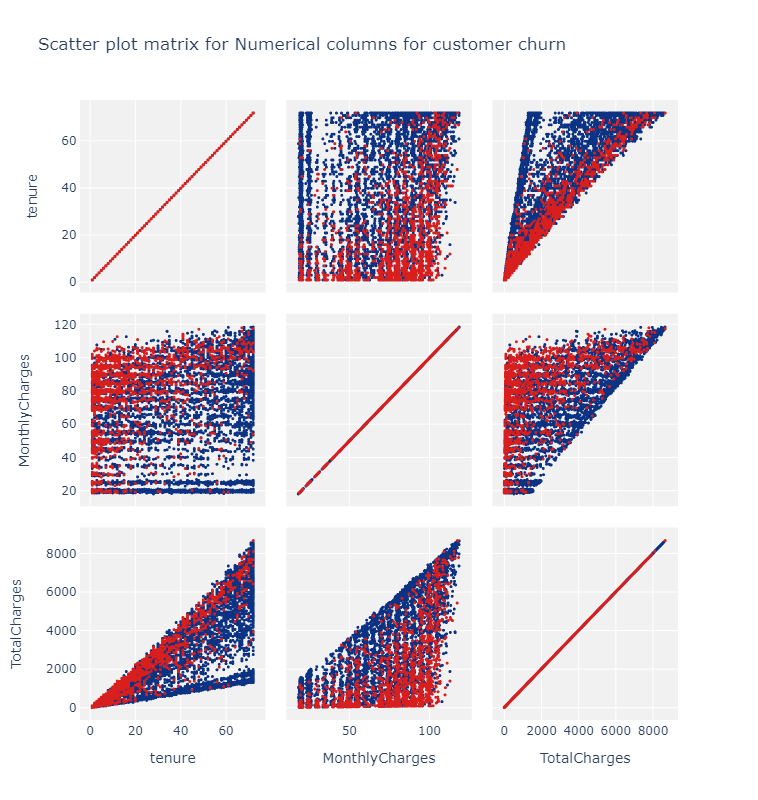

In [38]:
#scatter plot matrix
scatter_matrix(telcom)

Churned customers with smaller tenures had less totalcharges but as tenure increased so did the total charge,which makes sense. Same for the retained customers.
Monthly charges also increased with tenure but not so strongly.


# Data Pre-Processing


In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


#customer id col
Id_col     = ['customerID']
#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols   = telcom.nunique()[telcom.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]



In [40]:
multi_cols

['MultipleLines',
 'InternetService',
 'Contract',
 'PaymentMethod',
 'tenure_group']

In [41]:
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    telcom[i] = le.fit_transform(telcom[i])
    
#Duplicating columns for multi value columns
telcom = pd.get_dummies(data = telcom,columns = multi_cols)







In [42]:
telcom

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,5575-GNVDE,1,0,0,0,34,1,1,0,1,...,0,0,0,0,1,0,0,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,1,1,0,...,0,0,0,0,1,1,0,0,0,0
3,7795-CFOCW,1,0,0,0,45,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,1,0,1,1,24,1,1,0,1,...,0,0,0,0,1,0,1,0,0,0
7028,2234-XADUH,0,0,1,1,72,1,0,1,1,...,0,0,1,0,0,0,0,0,0,1
7029,4801-JZAZL,0,0,1,1,11,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
7030,8361-LTMKD,1,1,1,0,4,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [43]:
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [44]:
scaled

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457
...,...,...,...
7027,-0.343137,0.664868,-0.129180
7028,1.612573,1.276493,2.241056
7029,-0.872808,-1.170004,-0.854514
7030,-1.158016,0.319168,-0.872095


In [45]:
#df_telcom_og

In [46]:
telcom = telcom.drop(columns = num_cols,axis = 1)
telcom = telcom.merge(scaled,left_index=True,right_index=True,how = "left")

In [47]:
telcom

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,0,0,...,0,1,1,0,0,0,0,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,1,0,1,1,...,0,0,0,0,1,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,-1.239504,0.196178,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,1,0,1,1,1,1,0,1,1,...,0,1,0,1,0,0,0,-0.343137,0.664868,-0.129180
7028,2234-XADUH,0,0,1,1,1,0,1,1,0,...,0,0,0,0,0,0,1,1.612573,1.276493,2.241056
7029,4801-JZAZL,0,0,1,1,0,1,0,0,0,...,1,0,1,0,0,0,0,-0.872808,-1.170004,-0.854514
7030,8361-LTMKD,1,1,1,0,1,0,0,0,0,...,0,1,1,0,0,0,0,-1.158016,0.319168,-0.872095


In [48]:
summary = telcom.describe().transpose()
summary

,count,mean,std,min,25%,50%,75%,max
gender,7032.0,5.046928e-01,0.500014,0.000000,0.000000,1.000000,1.000000,1.000000
SeniorCitizen,7032.0,1.624005e-01,0.368844,0.000000,0.000000,0.000000,0.000000,1.000000
Partner,7032.0,4.825085e-01,0.499729,0.000000,0.000000,0.000000,1.000000,1.000000
Dependents,7032.0,2.984926e-01,0.457629,0.000000,0.000000,0.000000,1.000000,1.000000
PhoneService,7032.0,9.032992e-01,0.295571,0.000000,1.000000,1.000000,1.000000,1.000000
OnlineSecurity,7032.0,2.865472e-01,0.452180,0.000000,0.000000,0.000000,1.000000,1.000000
OnlineBackup,7032.0,3.448521e-01,0.475354,0.000000,0.000000,0.000000,1.000000,1.000000
DeviceProtection,7032.0,3.438567e-01,0.475028,0.000000,0.000000,0.000000,1.000000,1.000000
TechSupport,7032.0,2.901024e-01,0.453842,0.000000,0.000000,0.000000,1.000000,1.000000
StreamingTV,7032.0,3.843857e-01,0.486484,0.000000,0.000000,0.000000,1.000000,1.000000


## Variable Summary

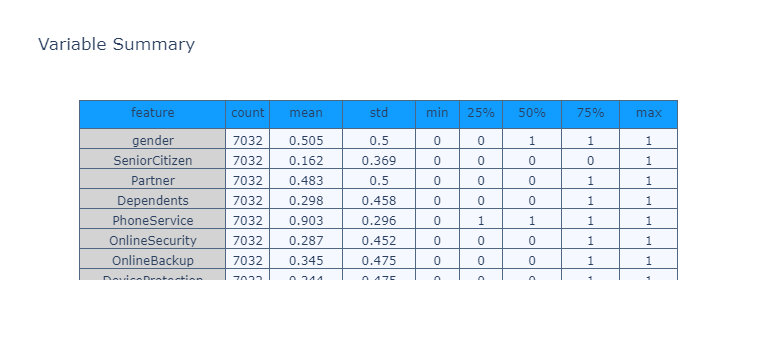

In [49]:
# To make it look nice we can do some additional stuff if needed
summary = (telcom[[i for i in telcom.columns if i not in Id_col]].
           describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['#119DFF']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout = go.Layout(dict(title = "Variable Summary"))
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)

In [50]:
#correlation
correlation = telcom.corr()
#tick labels
matrix_cols = correlation.columns.tolist()

In [51]:
#convert to array
corr_array  = np.array(correlation)

In [52]:
correlation

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
gender,1.000000,-0.001819,-0.001379,0.010349,-0.007515,-0.016328,-0.013093,-0.000807,-0.008507,-0.007124,...,0.000844,0.013199,-0.001050,-0.000649,-0.010516,-0.004319,0.016279,0.005285,-0.013779,0.000048
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.008392,-0.038576,0.066663,0.059514,-0.060577,0.105445,...,0.171322,-0.152987,-0.027713,0.001860,0.020383,0.014186,-0.002407,0.015683,0.219874,0.102411
Partner,-0.001379,0.016957,1.000000,0.452269,0.018397,0.143346,0.141849,0.153556,0.120206,0.124483,...,-0.083207,-0.096948,-0.305061,-0.048481,0.028468,0.105341,0.280353,0.381912,0.097825,0.319072
Dependents,0.010349,-0.210550,0.452269,1.000000,-0.001078,0.080786,0.023639,0.013900,0.063053,-0.016499,...,-0.149274,0.056448,-0.145379,-0.001459,0.024645,0.031419,0.118090,0.163386,-0.112343,0.064653
PhoneService,-0.007515,0.008392,0.018397,-0.001078,1.000000,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,...,0.002747,-0.004463,-0.006950,0.012307,-0.014778,-0.009750,0.020516,0.007877,0.248033,0.113008
OnlineSecurity,-0.016328,-0.038576,0.143346,0.080786,-0.091676,1.000000,0.283285,0.274875,0.354458,0.175514,...,-0.112295,-0.079918,-0.242409,-0.055662,0.007695,0.071663,0.263228,0.328297,0.296447,0.412619
OnlineBackup,-0.013093,0.066663,0.141849,0.023639,-0.052133,0.283285,1.000000,0.303058,0.293705,0.281601,...,-0.000364,-0.174075,-0.267366,-0.084081,0.023085,0.099192,0.278788,0.361138,0.441529,0.510100
DeviceProtection,-0.000807,0.059514,0.153556,0.013900,-0.070076,0.274875,0.303058,1.000000,0.332850,0.389924,...,-0.003308,-0.187325,-0.273920,-0.077332,0.044972,0.076854,0.275537,0.361520,0.482607,0.522881
TechSupport,-0.008507,-0.060577,0.120206,0.063053,-0.095138,0.354458,0.293705,0.332850,1.000000,0.277549,...,-0.114807,-0.084631,-0.238628,-0.072019,0.022137,0.062710,0.265396,0.325288,0.338301,0.432868
StreamingTV,-0.007124,0.105445,0.124483,-0.016499,-0.021383,0.175514,0.281601,0.389924,0.277549,1.000000,...,0.144747,-0.247712,-0.220761,-0.050234,0.028829,0.087969,0.198150,0.280264,0.629668,0.515709


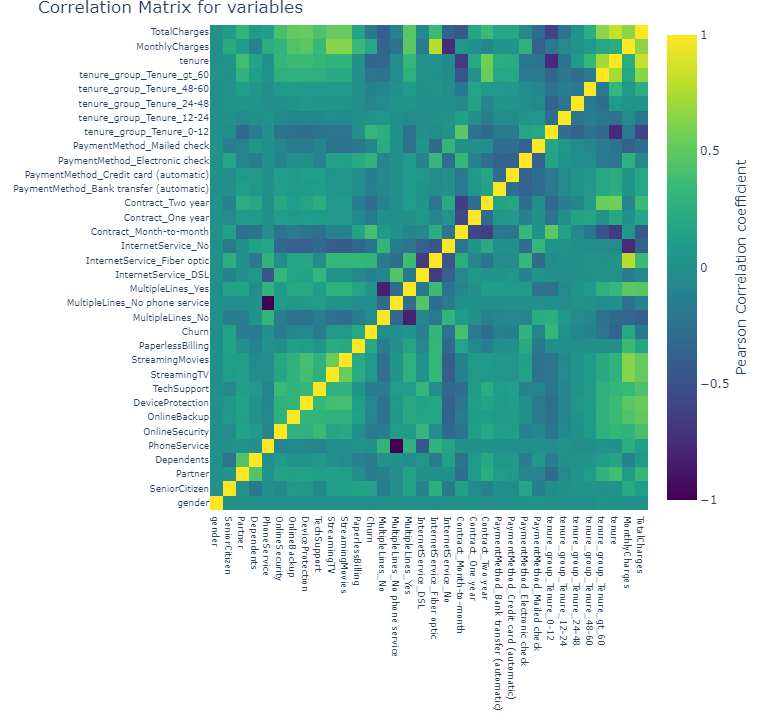

In [53]:
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)



#### Q. What do you observe?

Correlation between internet_service_fiber_optic,contract_month_to_month,payment_method_check ,tenure_group_0_12 and our target variable churn is significant amonth all others.
Tenure_group_0_12 has a high -ve correaltion with Total Charges.
Greater the tenure and more Services, greater the Total charges. Correlation for Monthly charges and tenure groups 12-24 and 0-12 is negative while positive for all others. Customers with more internet_service_no have less monthly charges.